In [2]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
cd /content/gdrive/My Drive

/content/gdrive/My Drive


In [4]:
import pandas as pd
import numpy as np         
from random import shuffle
from PIL import Image #pillow
import matplotlib.pyplot as plt
import seaborn as sns
# supressing warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
train1 = np.load("/content/gdrive/My Drive/train_data.npy",allow_pickle=True)

In [0]:
X, y = zip(*train1)

In [0]:
#list to array
X = np.array(X)
y = np.array(y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [0]:
from keras.applications import InceptionResNetV2

In [16]:
# parameters for architecture
input_shape = (600, 600, 3)
num_classes = 2
conv_size = 32

# parameters for training
batch_size = 8
num_epochs = 50

# load InceptionV3 from Keras
InceptionResNetV2_model = InceptionResNetV2(include_top=False, input_shape=input_shape)

# add custom Layers
x = InceptionResNetV2_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation="relu")(x)
Custom_Output = Dense(num_classes, activation='softmax')(x)

# define the input and output of the model
InceptionResNetV2_model = Model(inputs = InceptionResNetV2_model.input, outputs = Custom_Output)
        
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

# compile the model
InceptionResNetV2_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
InceptionResNetV2_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 600, 600, 3)  0                                            
__________________________________________________________________________________________________
conv2d_204 (Conv2D)             (None, 299, 299, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_204 (BatchN (None, 299, 299, 32) 96          conv2d_204[0][0]                 
__________________________________________________________________________________________________
activation_204 (Activation)     (None, 299, 299, 32) 0           batch_normalization_204[0][0]    
____________________________________________________________________________________________

In [17]:
history = InceptionResNetV2_model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=50,
                    verbose=1,
                    validation_split=0.1)

Train on 202 samples, validate on 23 samples
Epoch 1/50
202/202 [==============================] - 103s 509ms/step - loss: 0.7508 - accuracy: 0.5594 - val_loss: 5941.3747 - val_accuracy: 0.4783
Epoch 2/50
202/202 [==============================] - 41s 203ms/step - loss: 0.7125 - accuracy: 0.5693 - val_loss: 1029.3770 - val_accuracy: 0.5217
Epoch 3/50
202/202 [==============================] - 42s 206ms/step - loss: 0.5539 - accuracy: 0.6881 - val_loss: 677.7493 - val_accuracy: 0.4783
Epoch 4/50
202/202 [==============================] - 42s 209ms/step - loss: 0.4693 - accuracy: 0.8168 - val_loss: 13170.2277 - val_accuracy: 0.4783
Epoch 5/50
202/202 [==============================] - 42s 210ms/step - loss: 0.3879 - accuracy: 0.8267 - val_loss: 493.1723 - val_accuracy: 0.4783
Epoch 6/50
202/202 [==============================] - 43s 212ms/step - loss: 0.2372 - accuracy: 0.8960 - val_loss: 2.2602 - val_accuracy: 0.8261
Epoch 7/50
202/202 [==============================] - 43s 212ms/step -

In [0]:
def make_classes(y_pred):
    for i in y_pred:
        if i[0] > 0.5:
            i[0]=1
            i[1]=0
        elif i[0] <= 0.5:
            i[1]=1
            i[0]=0
    return y_pred

In [19]:
y_tINRV2_pred = InceptionResNetV2_model.predict(X_test)
make_classes(y_tINRV2_pred)
testy = y_test[:, 0]
yt_classes = y_tINRV2_pred[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy = roc_auc_score(testy, yt_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(testy, yt_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testy, yt_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testy, yt_classes)
print('F1 score: %f' % f1)

Accuracy: 0.807692
Precision: 1.000000
Recall: 0.615385
F1 score: 0.761905


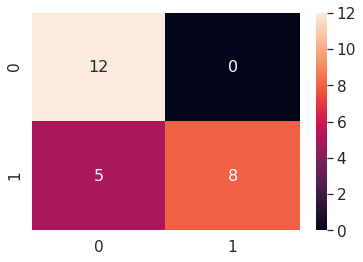

In [20]:
matrix = confusion_matrix(testy, yt_classes)      
df_cm = pd.DataFrame(matrix, range(2),
                  range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16});# font size

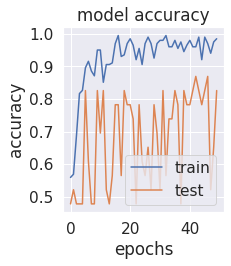

In [21]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend();
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='lower right')
plt.tight_layout();

In [0]:
#saving the model 
InceptionResNetV2_model.save_weights('InceptionResNetV2_model_wieghts.h5')
model_json = InceptionResNetV2_model.to_json()
with open("InceptionResNetV2_model.json", "w") as json_file:
    json_file.write(model_json)